# Supervised Learning with scikit-learn
Run the hidden code cell below to import the data used in this course.

In [153]:
# Importing pandas
import pandas as pd
import numpy as np

# Importing the course datasets 
diabetes = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')
telecom = pd.read_csv("datasets/telecom_churn_clean.csv")


***********************************************

***********************************************

***********************************************




# **Chapter1: Classification**

- ## **K-nearest neighbors (KNN)**

In [154]:
from sklearn.neighbors import KNeighborsClassifier

y = telecom["churn"]# y is my Target variable = dependent variable = response variable
X = telecom[["account_length", "customer_service_calls"]].values# X is my  Feature = predictor variable = independent variable
print("Y shape =",y.shape,"\nX shape =",X.shape)

# Create a KNN classifier with 6 neighbors
knn= KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X,y)


#now we can use new data to predict the churn
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
# Predict the labels for the X_new
y_pred = knn.predict(X_new)
print("Predictions: {}".format(y_pred)) 


Y shape = (3333,) 
X shape = (3333, 2)
Predictions: [0 1 0]


**But how do we know how accurate these predictions are?**

- ## **Train/test split + computing accuracy**

In [155]:
from sklearn.model_selection import train_test_split

X = telecom.drop("churn", axis=1).values# we took all cols except the churn col
y = telecom["churn"].values


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
print("X_train shape =",X_train.shape,"\nX_test shape =",X_test.shape)
print("y_train shape =",y_train.shape,"\ny_test shape =",y_test.shape)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print("accuracy=",knn.score(X_test, y_test))


X_train shape = (2666, 19) 
X_test shape = (667, 19)
y_train shape = (2666,) 
y_test shape = (667,)
accuracy= 0.8545727136431784


- ## **Overfitting and underfitting**

In [156]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train,y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train,y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print('\ntrain_accuracies=', train_accuracies, '\n\ntest_accuracies=', test_accuracies)


train_accuracies= {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 

test_accuracies= {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


**Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.**

- ## **Visualizing model complexity**

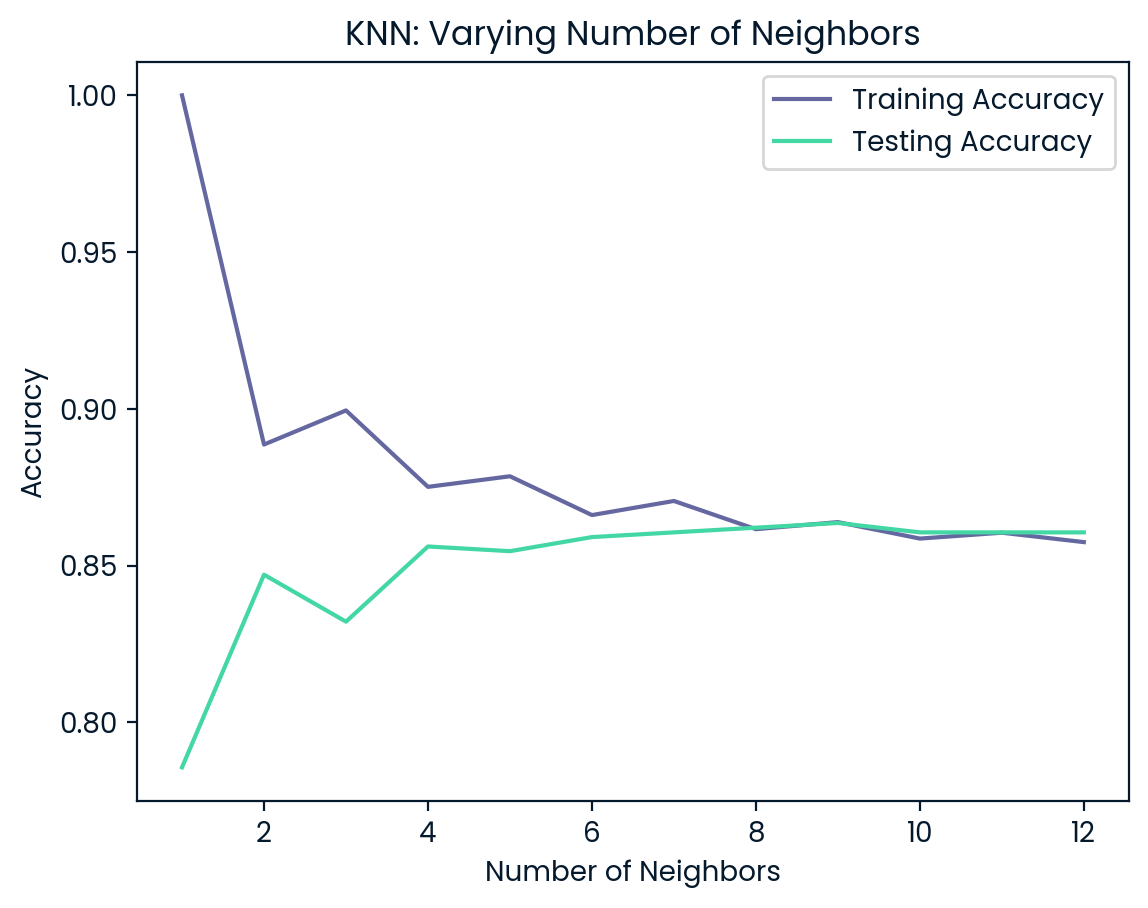

In [157]:
import matplotlib.pyplot as plt
# Add a title

plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()


***********************************************

***********************************************

***********************************************

***********************************************

***********************************************



# **Chapter2: Regression**

- ## **Creating features**

In [158]:

x=advertising["radio"].values
y=advertising["sales"].values
print(type(x),type(y))
print(x.shape)#=>(4546,) sklearn needs 2 dim array so we need to reshape our vector
# Reshape X
X_radio = x.reshape(-1,1)
# Reshape y to be a 2D array
y = y.reshape(-1, 1)
# Check the shape of the features and targets
print(X_radio.shape,y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(4546,)
(4546, 1) (4546, 1)


- ## **Building a linear regression model**

In [159]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()
# Fit the model to the data
reg.fit(X_radio,y)

# Make predictions
predictions = reg.predict(X_radio)

# Display the first 5 predictions
predictions[:5]

array([[ 95491.17119147],
       [117829.51038393],
       [173423.38071499],
       [291603.11444202],
       [111137.28167129]])

- ## **Visualizing a linear regression model**

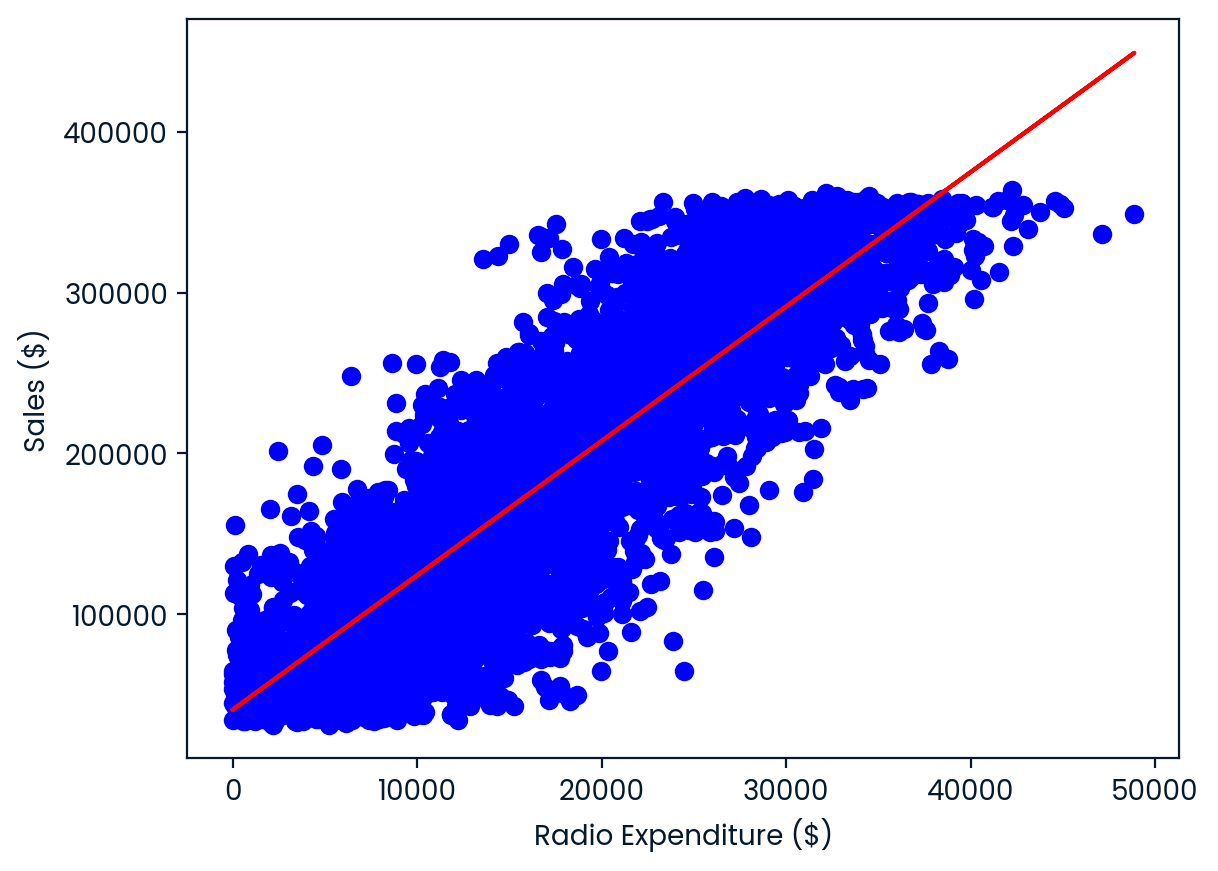

In [160]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X_radio, y, color="blue")

# Create line plot
plt.plot(X_radio, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

**The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales!**


***********************************************

***********************************************




- ## **Fit and predict for regression (multiple linear regression model)**

In [161]:
# Create X and y arrays

X = advertising.drop(["sales","influencer"], axis=1).values
y = advertising["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


- ## **Regression performance**
**RMSE**:Error metric

**R_squares**: Goodness-of-fit metric

R-squared quantifies how well the features explain the variance in the target variable, while RMSE measures the average magnitude of the errors between predicted and actual values.

In [162]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


- ## **Cross-validation for R-squared**
Cross-validation is a vital approach to **evaluating** a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In [163]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object=> splits the data into n-splits take 1 fold each time than fit and predict n times  
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X , y, cv=kf)
print(cv_scores)
      
# Print the mean
print("mean=",np.mean(cv_scores))

# Print the standard deviation,
print("standard deviation=",np.std(cv_scores))

# Print the 95% confidence interval
print("95% confidence interval=",np.quantile(cv_scores, [0.025, 0.975]))

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]
mean= 0.9989896443678249
standard deviation= 6.608118371529651e-05
95% confidence interval= [0.99889767 0.99908583]


- ## **Regularized regression: Ridge**
Ridge regression performs regularization by computing the  squared values of the model parameters multiplied by alpha and adding them to the **loss function(OLS)**

_regularzation => to reduce model complexity and prevent overfitting_




In [164]:
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0] 
#alpha is a hyperparametre we will try diff values of alpha to find the best performance
ridge_scores = []

for alpha in alphas:
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print("R_squared values:",ridge_scores)

R_squared values: [0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

- ## **Lasso regression for feature importance**
 lasso regression can be used to identify important features in a dataset.

[ 3.56289375e+00  3.07776096e-03 -2.86451291e-02]


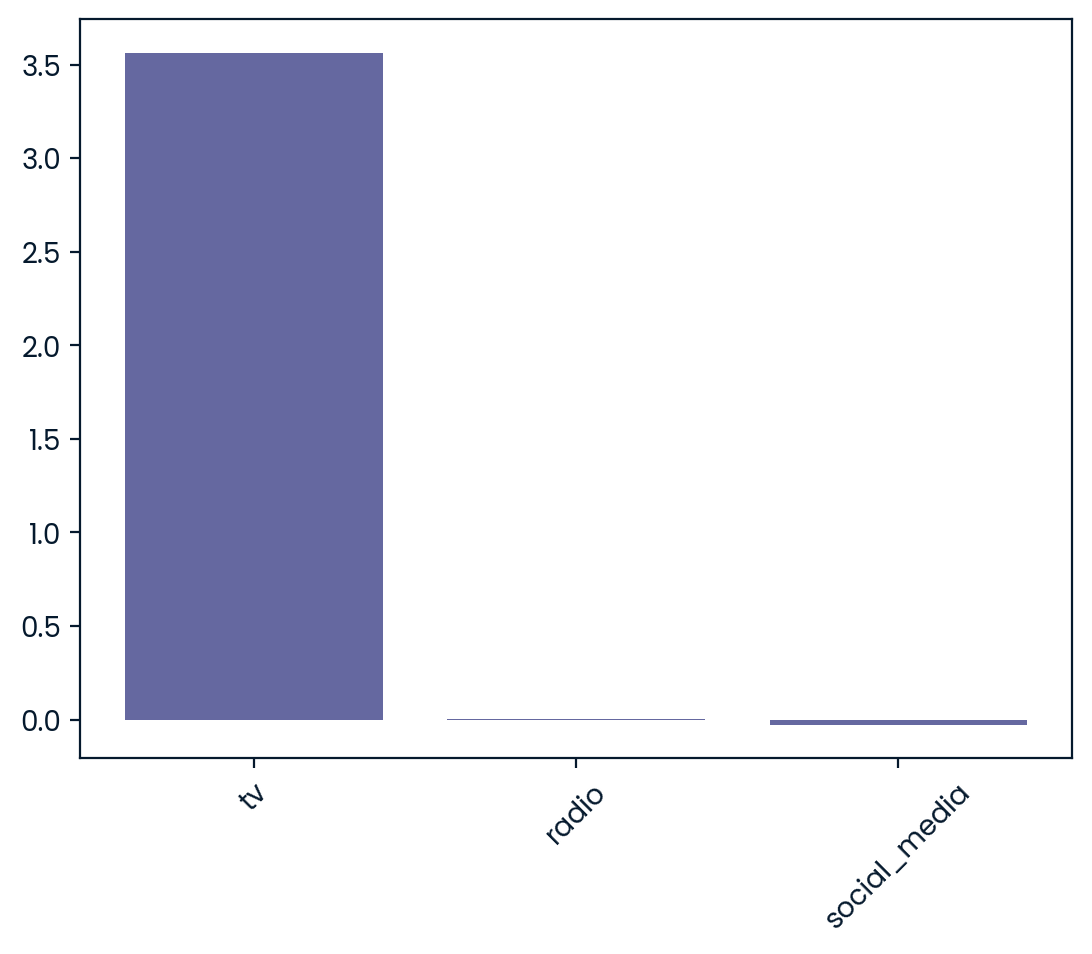

In [165]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso_trained_model=lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso_trained_model.coef_
print(lasso_coef)
sales_columns=advertising.drop(["sales","influencer"], axis=1).columns#my features columns 
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

TV advertising is the most important feature in the dataset to predict sales values!
![image](image.png)



***********************************************

***********************************************

***********************************************

***********************************************

***********************************************



# **Chapter3: Fine-Tuning Your Model**

several metrics can be useful to evaluate the performance of classification models, including **accuracy, precision, recall, and F1-score.**



In [166]:
from sklearn.model_selection import train_test_split

diabetes_features=diabetes.drop("diabetes",axis=1).values
diabetes_labels=diabetes["diabetes"].values
print(type(diabetes_features),diabetes_features.shape)
print(type(diabetes_labels),diabetes_labels.shape)

#now we split the data into training and testing
diabetes_features_train , diabetes_features_test , diabetes_labels_train , diabetes_labels_test = train_test_split(diabetes_features,diabetes_labels , test_size=0.3 ,random_state=8,stratify=diabetes_labels)

print("X_train=",diabetes_features_train.shape,"\nX_test=",diabetes_features_test.shape)
print("y_train=",diabetes_labels_train.shape,"\ny_test=",diabetes_labels_test.shape)


<class 'numpy.ndarray'> (768, 8)
<class 'numpy.ndarray'> (768,)
X_train= (537, 8) 
X_test= (231, 8)
y_train= (537,) 
y_test= (231,)


- ## **Assessing a diabetes prediction classifier**

In [167]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(diabetes_features_train,diabetes_labels_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(diabetes_features_test)

# Generate the confusion matrix and classification report
print("confusion matrix: \n",confusion_matrix(diabetes_labels_test, y_pred))
print("classification report:\n",classification_report(diabetes_labels_test, y_pred))

confusion matrix: 
 [[123  27]
 [ 49  32]]
classification report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.76       150
           1       0.54      0.40      0.46        81

    accuracy                           0.67       231
   macro avg       0.63      0.61      0.61       231
weighted avg       0.65      0.67      0.66       231



- ## **Building a logistic regression model**

In [168]:
from sklearn.linear_model import LogisticRegression
# Instantiate the model
logreg = LogisticRegression()
# Fit the model
logreg.fit(diabetes_features_train,diabetes_labels_train)
# Predict probabilities
diabetes_pred_probs = logreg.predict_proba(diabetes_features_test)[:, 1]#we take second column=> the probabilty that the label is 1 

print(diabetes_pred_probs[:10])

[0.93539276 0.65694846 0.93266943 0.02468875 0.76833503 0.095415
 0.50153971 0.83604938 0.73638946 0.01044575]


- ## **The ROC curve**(reciver operating curve)
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

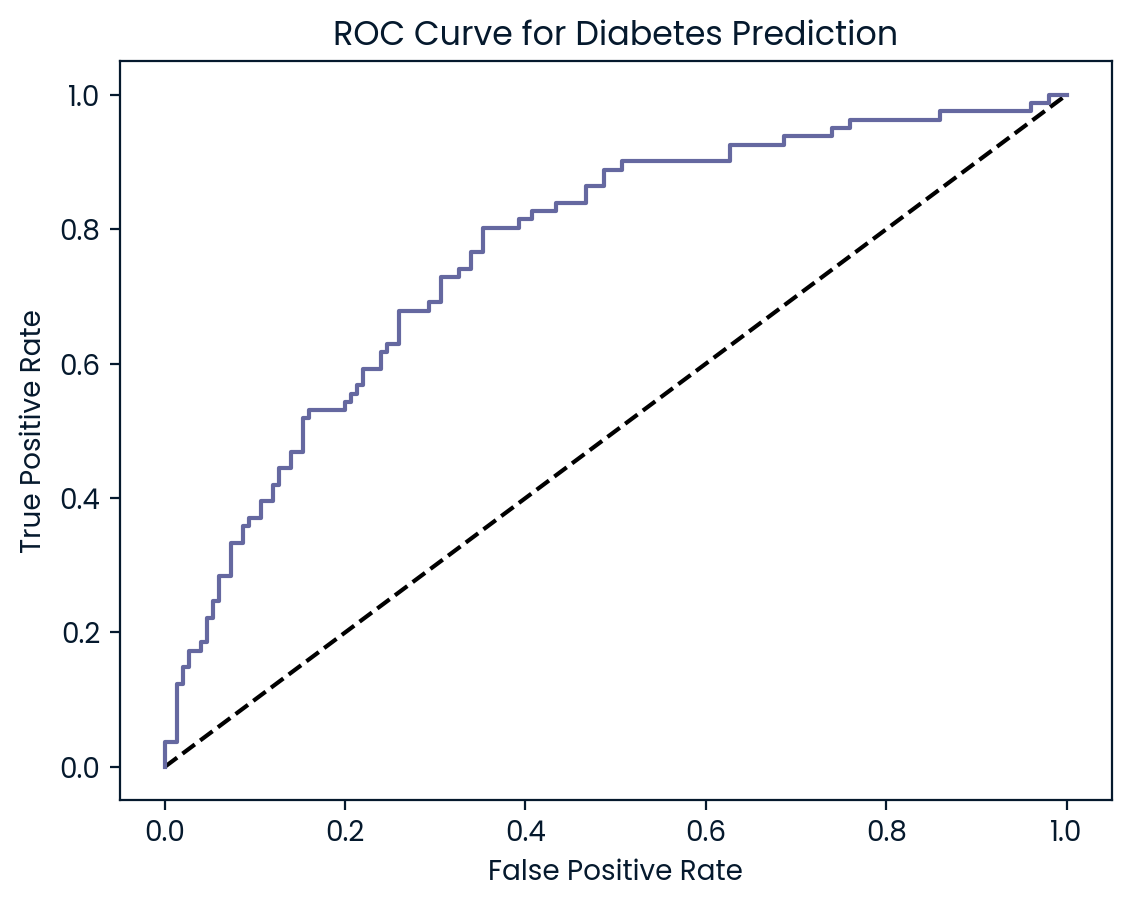

In [169]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(diabetes_labels_test, diabetes_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.


- ## **ROC AUC**(area under curve metric)

In [170]:

from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(diabetes_labels_test, diabetes_pred_probs))
diabetes_pred=logreg.predict(diabetes_features_test)
# Calculate the confusion matrix
print(confusion_matrix(diabetes_labels_test, diabetes_pred))

# Calculate the classification report
print(classification_report(diabetes_labels_test, diabetes_pred))

0.765843621399177
[[121  29]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       150
           1       0.60      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.765 means this model is 26.5% better than a chance model at correctly predicting labels! 
-  model with an AUC close to 1 is generally considered good.
- A model with an AUC around 0.7-0.8 is considered okay, though improvement may be necessary.

*********************************************

*********************************************

- ## **Hyperparameter tuning with GridSearchCV**

In [171]:
from sklearn.model_selection import GridSearchCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)
# Set up the parameter grid
param_grid = {"alpha": np.linspace( 0.00001, 1,20)}#we can add more hyperparametres to tune 
#linespace will make an array of 20 values starting from 0.000010.00001 and ending at 1, with equal spacing between each partition

lasso=Lasso()# instantiate lasso model 
# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid , cv=kf)#we pass the model & the multiple hyperparameters we wants to try 

# Fit to the training data
lasso_cv.fit(diabetes_features_train,diabetes_labels_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.3111276269260242


Unfortunately, the best model only has an R-squared score of 0.31, highlighting that using the optimal hyperparameters does not guarantee a high performing model

- ## **Hyperparameter tuning with RandomizedSearchCV**
As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

In [172]:
from sklearn.model_selection import RandomizedSearchCV
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}
#penalty refers to the type of regularization applied to the Logistic Regression model to prevent overfitting.
#"l1" applies Lasso regularization, which can lead to sparsity by pushing some weights to zero, essentially selecting features.
#"l2" applies Ridge regularization, which penalizes large weights but doesn’t usually lead to zero weights, so all features are retained.
#tol stands for tolerance. It controls the precision of the model's stopping criteria during optimization, affecting convergence.
#C is the inverse of the regularization strength Lower values of C imply stronger regularization, which can reduce overfitting but may lead to underfitting if too strong.
#class_weight adjusts the model’s sensitivity to each class. This is especially useful when dealing with imbalanced data.


# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(diabetes_features_train, diabetes_labels_train)
    
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))
print("Number of combinations tried: {}".format(len(logreg_cv.cv_results_['params'])))#to check how many combination did the model tried
#Total combinations = 2×50×50×2=10,000
#If n_iter is set to 10 (default value), RandomizedSearchCV will randomly select and evaluate 10 combinations out of those 10,000 possible combinations. These combinations will be unique due to the random sampling.
#So, to summarize, it doesn't just try the first 10 combinations; it randomly samples 10 combinations from the potentially huge search space you defined.


Tuned Logistic Regression Parameters: {'tol': 0.36741020408163266, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.3204081632653062}
Tuned Logistic Regression Best Accuracy Score: 0.7562478366216684
Number of combinations tried: 10


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! 

*********************************************

*********************************************

*********************************************


*****
*****

# **Chapter4: Preprocessing and Pipelines**

## **1. Preprocessing data**

In [173]:
# music df will be our dataset for this chapter
music_df=music.iloc[:,1:] 
genres = ['Alternative','Anime', 'Blues', 'Classical', 'Country', 'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock']
music_df['genre'] = np.random.choice(genres, size=len(music_df))
print(music_df.head(),music_df.shape)

   popularity  acousticness  danceability  ...    tempo  valence    genre
0        60.0      0.896000         0.726  ...   92.934    0.618  Hip-Hop
1        63.0      0.003840         0.635  ...  110.012    0.637      Rap
2        59.0      0.000075         0.352  ...  122.897    0.228     Rock
3        54.0      0.945000         0.488  ...  106.063    0.323  Hip-Hop
4        55.0      0.245000         0.667  ...  143.995    0.300  Country

[5 rows x 12 columns] (1000, 12)


In [174]:
#in our data set weh have the genre column is a categorical columnn so we neeed to transform it into numeric in order to make our model
#===> one hot encoding
music_dummies = pd.get_dummies(music_df,drop_first=True)
#By removing one category, we maintain the same information without the redundancy, as that category can be inferred based on the values of the remaining columns.
print("Shape of music_dummies: {}".format(music_dummies.shape))
print(music_dummies.columns)

Shape of music_dummies: (1000, 20)
Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre_Anime', 'genre_Blues', 'genre_Classical',
       'genre_Country', 'genre_Electronic', 'genre_Hip-Hop', 'genre_Jazz',
       'genre_Rap', 'genre_Rock'],
      dtype='object')


- ## **Regression with categorical features**
Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

In [175]:
# Create X and y(features & labels)
X = music_dummies.drop("popularity",axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)
# Perform cross-validation

scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")
# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))


Average RMSE: 12.581103533772463
Standard Deviation of the target array: 14.02156909907019


RMSE < the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

************************************************
************************************************

## **2. Handling missing data**

- **Dropping missing data**

In [176]:
# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
# Convert genre to a binary feature ( 1 if the row contains "Rock", otherwise change the value to 0.)
print(music_df["genre"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
# Print missing values for each column
#print(music_df.isna().sum().sort_values())

0          Hip-Hop
1              Rap
2             Rock
3          Hip-Hop
4          Country
          ...     
995          Anime
996    Alternative
997           Jazz
998            Rap
999            Rap
Name: genre, Length: 1000, dtype: object


- ## **impute missing values: Pipeline for song genre prediction**
Now it's time to build a pipeline. It will contain steps to impute missing values using the mean (default state of simpleimputer())for each feature and build a KNN model for the classification of song genre.

In [177]:
# Import modules
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
# Instantiate an imputer
#impute: replace missing values with relavent one like mean , avg ,median , mode ...
imputer =  SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputation", imputer), 
         ("knn model", knn)]

now lets use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

In [178]:
# lets split our data first!
X = music_df.drop("genre", axis=1).values 
y = music_df["genre"].values

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[261  10]
 [ 27   2]]


************************************************
************************************************

  ## **3.Centering and scaling**

-why scale? : Many models use some form of distance to inform them,  Features on larger scales can disproportionately influence the model =>We want features to be on a similar scale exp([0-99999999]=>[0,1])

- ###  **Centering and scaling for regression**

In [179]:
# lets split our data first!
X = music_df.drop("loudness", axis=1).values 
y = music_df["loudness"].values
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [180]:
from sklearn.preprocessing import  StandardScaler
lasso=Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
print('first model R^2 without scaling :',lasso.score(X_test, y_test))

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print('second model R^2 after scaling :',pipeline.score(X_test, y_test))

first model R^2 without scaling : 0.5031316281225606
second model R^2 after scaling : 0.7185052288252618


The model may have only produced an R-squared of 0.718, but without scaling this exact model would have only produced a score of 0.50, which proves just how powerful scaling can be!

- ### **Centering and scaling for classification**

Now we will bring together scaling and model building into a pipeline for cross-validation.

In [181]:
# lets split our data first!
X = music_df.drop("genre", axis=1).values 
y = music_df["genre"].values
#***************************************************************************

steps = [("scaler", StandardScaler()),
         ("logreg",  LogisticRegression())]

pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
#!!! be careful in the parametrs names it should be always "urmodelname__"+"parameter"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8875 
 {'logreg__C': 0.001}


***************************************
***************************************


 ## **3.Evaluating multiple models**

- ## **Visualizing regression model performance**

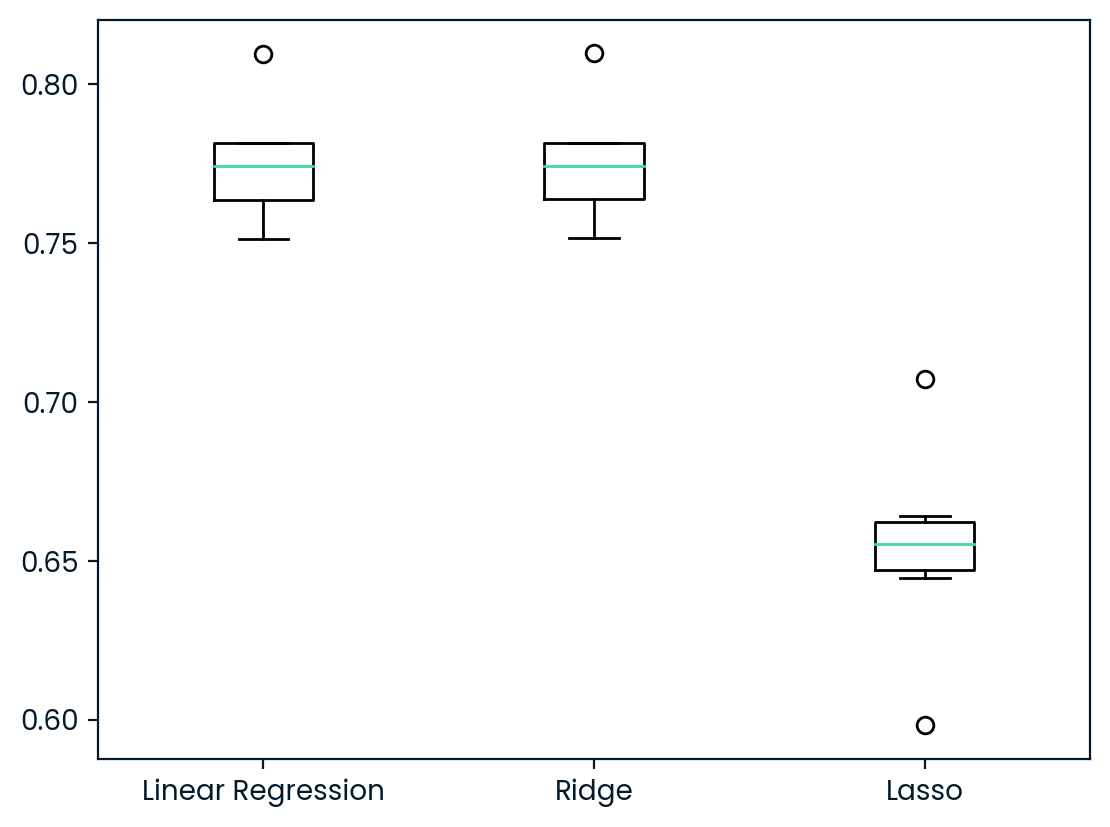

In [182]:
# lets split our data first!
X = music_df.drop("energy", axis=1).values 
y = music_df["energy"].values
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#***************************************************************************
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

==>Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

- ## **Predicting on the test set**
linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

In [183]:
from sklearn.metrics import mean_squared_error
#lets scale our data first (best practice)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse =mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.11100822968625558
Ridge Test Set RMSE: 0.11101126003083883
Lasso Test Set RMSE: 0.17329638628819166


=>lower RMSE indicates better performance, so, based on this metric alone, the Linear Regression model performs slightly better

****
*****
****
***


- ## **Visualizing classification model performance**

now lets see what is the best model to classify songs popularity

In [184]:
# lets prepare our data  first!

music_data = music_df
median_popularity = music_data['popularity'].median()
# Convert 'popularity' column to binary values based on the median
music_data['popularity'] = (music_data['popularity'] >= median_popularity).astype(int)
#"popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

X = music_data.drop("popularity", axis=1).values 
y = music_data["popularity"].values
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

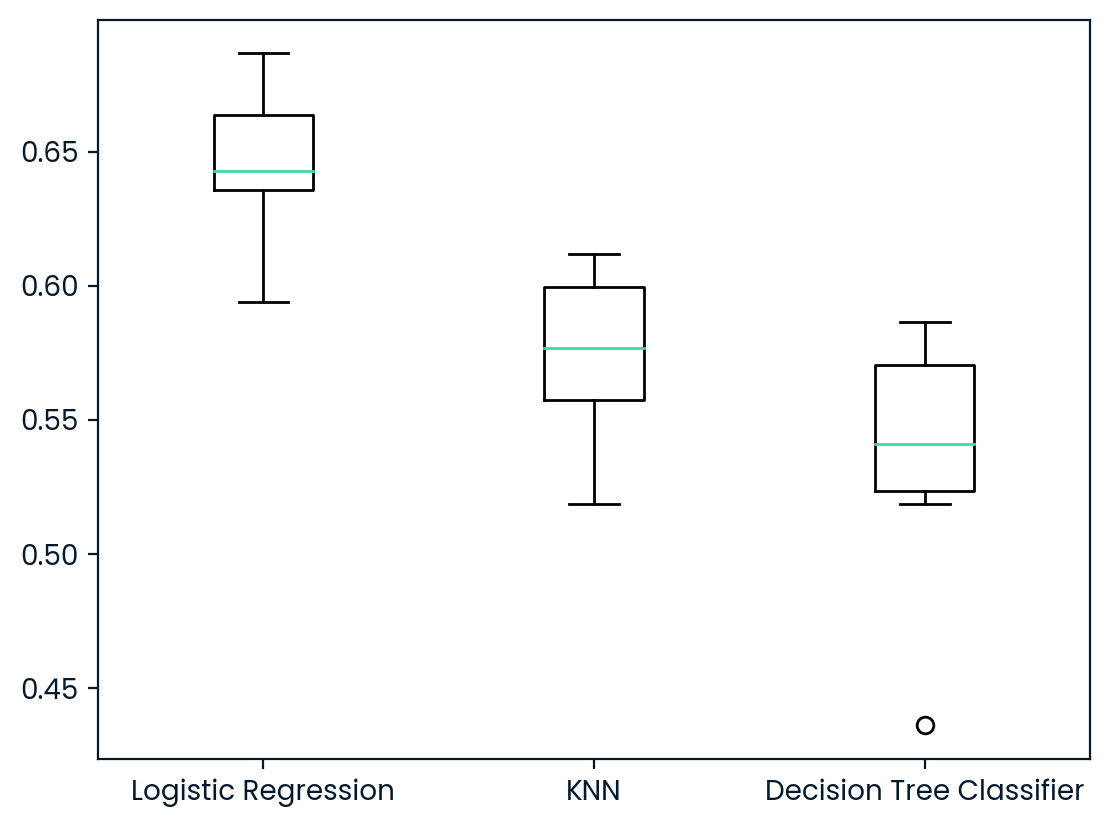

In [185]:
from sklearn.tree import DecisionTreeClassifier

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []


for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline

- ## **Pipeline for predicting song popularity**
we will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

In [186]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}
#solver parameter specifies the optimization algorithm used to find the best-fit coefficients


tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.58


******************************
*******
****
****
****


# **What you've covered**
- ###   Using supervised learning techniques to build predictive models
- ###   For both regression and classification problems
- ###   Underfitting and overfitting
- ###   How to split data
- ###   Cross-validation
- ###  Data preprocessing techniques
- ###  Model selection
- ###  Hyperparameter tuning
- ###  Model performance evaluation
- ###  Using pipelines
